In [1]:
#Requires to have geopandas installed
#Installation https://geopandas.org/getting_started/install.html

import geopandas as gpd
import geoplot
import pandas as pd
import fiona #;help(fiona.open)
import requests
from pandas.io.json import json_normalize # convert json into dataframe


In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

#  Adding MENA to Africa

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world

In [4]:
saudi = world.query('name == "Saudi Arabia"')
yemen = world.query('name == "Yemen"')
iraq = world.query('name == "Iraq"')
oman = world.query('name == "Oman"')
uae = world.query('name == "United Arab Emirates"')
jordan = world.query('name == "Jordan"')
palestine = world.query('name == "Palestine"')
israel = world.query('name == "Israel"')
qatar = world.query('name == "Qatar"')
kuwait = world.query('name == "Kuwait"')

mena = saudi.append(yemen).append(iraq).append(oman).append(uae).append(jordan).append(palestine).append(israel).append(qatar).append(kuwait)

In [5]:
africa = world.query('continent == "Africa"').append(mena)
#africa.head()

In [6]:
### Example plot https://geopandas.org/gallery/plotting_with_geoplot.html?highlight=africa

# #gdp_per_cap = world.gdp_md_est / world.pop_est
# ax = geoplot.cartogram(
#     africa, scale='pop_est', limits=(0.2, 1),
#     edgecolor='None', figsize=(7, 8)
# )
# geoplot.polyplot(africa, edgecolor='gray', ax=ax)

In [7]:
#ax = africa.plot(color="white", edgecolors="red",figsize=(10, 10))

# 2) MV lines (current & planned) - Onsset

Heavily based on pathfinder https://zenodo.org/record/3628142#.YFH1mf7LeEB 
Which applies facebook research to predict network structure from network lights https://github.com/facebookresearch/many-to-many-dijkstra/blob/master/Model%20Tutorial%20-%20PDF.pdf

TO DO:
- Check accuracy of network prediction! (from pdf the prediction is often good but not always. We can check the accruacy of the prediction by comparing results to real MV/HV grid )
- Elevation gradient could be added into cost function to improve prediction accuracy.
- Additional, predicted lines must be assigned a voltage level

Benefit of this method:
- Can be applied globally!

In [8]:
url = 'https://zenodo.org/record/3628142/files/grid.gpkg?download=1'
africa_network = gpd.read_file(url)

/home/max/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [9]:
africa_network.head()

,source,geometry
0,gridfinder,"LINESTRING (128.88542 71.73125, 128.87708 71.7..."
1,gridfinder,"LINESTRING (128.88542 71.73125, 128.89375 71.7..."
2,gridfinder,"LINESTRING (128.88542 71.70208, 128.88125 71.7..."
3,openstreetmap,"LINESTRING (128.88958 71.70208, 128.88542 71.7..."
4,openstreetmap,"LINESTRING (128.88542 71.69792, 128.88542 71.7..."


In [10]:
africa_network

,source,geometry
0,gridfinder,"LINESTRING (128.88542 71.73125, 128.87708 71.7..."
1,gridfinder,"LINESTRING (128.88542 71.73125, 128.89375 71.7..."
2,gridfinder,"LINESTRING (128.88542 71.70208, 128.88125 71.7..."
3,openstreetmap,"LINESTRING (128.88958 71.70208, 128.88542 71.7..."
4,openstreetmap,"LINESTRING (128.88542 71.69792, 128.88542 71.7..."
...,...,...
3678238,gridfinder,"LINESTRING (-70.93542 -53.17292, -70.93958 -53..."
3678239,gridfinder,"LINESTRING (-70.93542 -53.17292, -70.93542 -53..."
3678240,gridfinder,"LINESTRING (-70.94792 -53.18542, -70.94792 -53..."
3678241,gridfinder,"LINESTRING (-70.93958 -53.20208, -70.93542 -53..."


<AxesSubplot:>

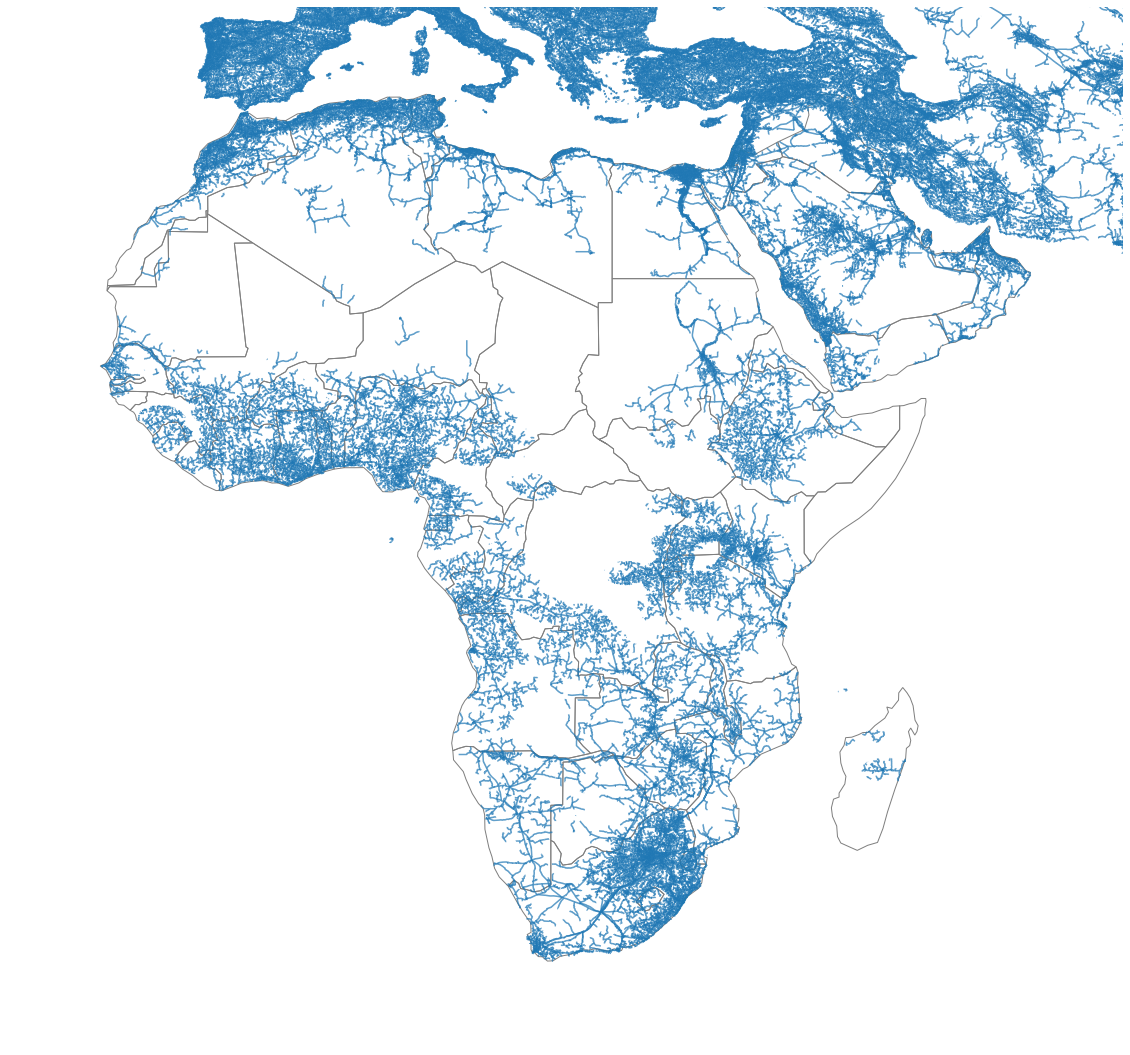

In [11]:
ax = africa_network.plot(figsize=(20, 20),alpha = 0.7)
geoplot.polyplot(africa, edgecolor='gray', ax=ax)